In [ ]:
%matplotlib notebook

In [50]:
import warnings
warnings.filterwarnings('ignore')

# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
from census import Census
import gmaps
import os
import datetime


In [12]:
# Read in csv file
pollution_data = pd.read_csv("https://raw.githubusercontent.com/khartmann5/Project_01/chris_stuff/Resources/Collected_Pollution_Measurements.csv")
pollution_data.head()

,datetime,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi,City,Public Transportation Rate,Median Age,Population
0,2021-01-31 12:00:00,781.06,38.89,87.74,0.09,23.60,35.14,45.48,10.89,4.0,Brooklyn,61.84046,34.694286,2480847.0
1,2021-01-31 11:00:00,534.06,5.87,78.14,4.47,20.98,18.22,24.25,6.33,2.0,Brooklyn,61.84046,34.694286,2480847.0
2,2021-01-31 10:00:00,460.63,1.36,67.86,13.23,20.03,13.65,18.51,5.07,2.0,Brooklyn,61.84046,34.694286,2480847.0
3,2021-01-31 09:00:00,447.27,0.83,63.75,15.38,19.07,12.76,17.30,4.75,2.0,Brooklyn,61.84046,34.694286,2480847.0
4,2021-01-31 08:00:00,447.27,0.82,61.69,15.02,17.17,12.64,16.99,4.69,2.0,Brooklyn,61.84046,34.694286,2480847.0


In [22]:
# len(pollution_data.index)
# 202130

# I want to make a dataframe with brooklyn data only
# Then I want to create a scatterplot

brooklyn_data = pollution_data.loc[pollution_data["City"] =='Brooklyn']

brooklyn_data

# brooklyn_df = pd.DataFrame([{"Gender" : "Male" , "Total Count" : male_count, "Percentage of Players" : percent_male},
#                             {"Gender" : "Female" , "Total Count" : female_count, "Percentage of Players" : percent_female},
#                             {"Gender" : "Other/ Non-Disclosed" , "Total Count" : other_count, "Percentage of Players" : percent_other}])

# gender_demo = gender_demo.set_index("Gender")

# gender_demo.index.name = None

# brooklyn_df

,datetime,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi,City,Public Transportation Rate,Median Age,Population
0,2021-01-31 12:00:00,781.06,38.89,87.74,0.09,23.60,35.14,45.48,10.89,4.0,Brooklyn,61.84046,34.694286,2480847.0
1,2021-01-31 11:00:00,534.06,5.87,78.14,4.47,20.98,18.22,24.25,6.33,2.0,Brooklyn,61.84046,34.694286,2480847.0
2,2021-01-31 10:00:00,460.63,1.36,67.86,13.23,20.03,13.65,18.51,5.07,2.0,Brooklyn,61.84046,34.694286,2480847.0
3,2021-01-31 09:00:00,447.27,0.83,63.75,15.38,19.07,12.76,17.30,4.75,2.0,Brooklyn,61.84046,34.694286,2480847.0
4,2021-01-31 08:00:00,447.27,0.82,61.69,15.02,17.17,12.64,16.99,4.69,2.0,Brooklyn,61.84046,34.694286,2480847.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69695,2021-01-01 16:00:00,647.54,36.66,71.29,12.88,22.17,21.65,33.74,5.95,3.0,Brooklyn,61.84046,34.694286,2480847.0
69696,2021-01-01 15:00:00,907.90,72.42,77.46,7.15,24.56,36.99,52.31,8.99,4.0,Brooklyn,61.84046,34.694286,2480847.0
69697,2021-01-01 14:00:00,947.95,74.21,80.20,2.21,22.65,40.66,55.01,10.13,4.0,Brooklyn,61.84046,34.694286,2480847.0
69698,2021-01-01 13:00:00,907.90,67.06,77.46,0.06,23.13,39.83,52.17,11.53,4.0,Brooklyn,61.84046,34.694286,2480847.0


In [44]:
type(brooklyn_data["datetime"][0])

str

In [56]:
df = brooklyn_data.sort_values("datetime")
df

,datetime,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi,City,Public Transportation Rate,Median Age,Population
696,2021-01-01 12:00:00,814.44,54.54,70.60,0.00,20.98,34.67,45.12,9.88,4.0,Brooklyn,61.84046,34.694286,2480847.0
69699,2021-01-01 12:00:00,814.44,54.54,70.60,0.00,20.98,34.67,45.12,9.88,4.0,Brooklyn,61.84046,34.694286,2480847.0
69698,2021-01-01 13:00:00,907.90,67.06,77.46,0.06,23.13,39.83,52.17,11.53,4.0,Brooklyn,61.84046,34.694286,2480847.0
695,2021-01-01 13:00:00,907.90,67.06,77.46,0.06,23.13,39.83,52.17,11.53,4.0,Brooklyn,61.84046,34.694286,2480847.0
694,2021-01-01 14:00:00,947.95,74.21,80.20,2.21,22.65,40.66,55.01,10.13,4.0,Brooklyn,61.84046,34.694286,2480847.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69005,2021-01-31 10:00:00,460.63,1.36,67.86,13.23,20.03,13.65,18.51,5.07,2.0,Brooklyn,61.84046,34.694286,2480847.0
1,2021-01-31 11:00:00,534.06,5.87,78.14,4.47,20.98,18.22,24.25,6.33,2.0,Brooklyn,61.84046,34.694286,2480847.0
69004,2021-01-31 11:00:00,534.06,5.87,78.14,4.47,20.98,18.22,24.25,6.33,2.0,Brooklyn,61.84046,34.694286,2480847.0
69003,2021-01-31 12:00:00,781.06,38.89,87.74,0.09,23.60,35.14,45.48,10.89,4.0,Brooklyn,61.84046,34.694286,2480847.0


In [113]:
time = pd.to_datetime(df["datetime"])
brooklyn_data["date"] = time.dt.date
mean_df = brooklyn_data.groupby("date").mean().reset_index()
mean_df

,date,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi,Public Transportation Rate,Median Age,Population
0,2021-01-01,604.430833,30.530000,58.265000,17.459167,15.800833,20.430833,30.456667,5.377500,2.583333,61.84046,34.694286,2480847.0
1,2021-01-02,367.583750,3.562500,29.768333,28.591667,3.828750,6.242083,8.515417,0.847083,1.250000,61.84046,34.694286,2480847.0
2,2021-01-03,447.134583,3.987500,51.065833,13.265000,7.832917,10.320000,14.943750,2.007500,1.833333,61.84046,34.694286,2480847.0
3,2021-01-04,513.196667,20.760833,57.078333,16.690000,14.628333,14.896667,19.739583,3.118333,2.125000,61.84046,34.694286,2480847.0
4,2021-01-05,835.299583,64.013750,76.512917,3.818750,18.789583,35.034583,45.689583,5.434583,3.416667,61.84046,34.694286,2480847.0
5,2021-01-06,526.130417,19.158333,57.207083,21.009583,9.294167,16.775417,22.225833,2.972083,2.333333,61.84046,34.694286,2480847.0
6,2021-01-07,350.197917,3.384583,38.785417,44.615417,7.872917,5.876250,8.683750,2.437083,1.458333,61.84046,34.694286,2480847.0
7,2021-01-08,562.569583,24.529167,65.118333,11.529583,14.261250,17.018333,23.605000,5.665833,2.458333,61.84046,34.694286,2480847.0
8,2021-01-09,435.592083,11.980417,43.855000,36.954583,10.757083,10.512500,14.050000,3.833333,1.791667,61.84046,34.694286,2480847.0
9,2021-01-10,513.474583,17.461667,61.205000,27.115833,9.944583,15.078750,20.159167,4.813750,2.083333,61.84046,34.694286,2480847.0


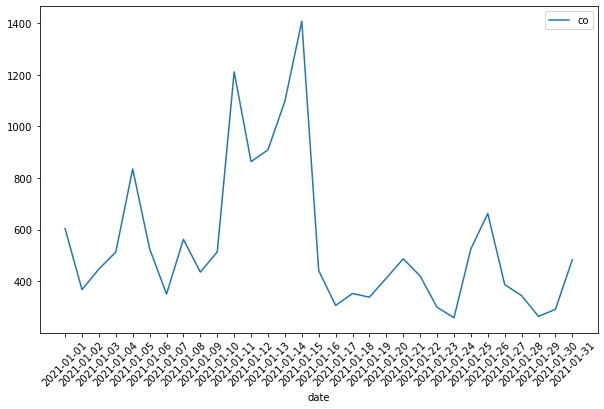

In [119]:
ax = mean_df.plot(x="date", y="co",figsize=(10,6),rot=45);
ax.set_xticks(mean_df["date"])
# ax.set_xticklabels(mean_df["date"])
plt.show()

(16096.0, 16102.0)

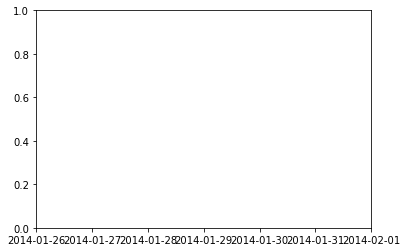

In [51]:
fig.autofmt_xdate()
plt.xlim([datetime.date(2014, 1, 26), datetime.date(2014, 2, 1)])

In [ ]:
city_pop = pd.read_csv("Resources/city_pop_transit_age_latlng.csv")
city_pop.head()

In [9]:
#combine csv data
#for now im just working with combined_data_large_cities

# Combine the two datasets into one
combined_data = pd.merge(city_pop,combined_data_large_cities, on="City")

# Export to csv
combined_data.to_csv("Resources/combined_pollution_population_transit_data1.csv")

# Display data table
combined_data

,City,Population,Public Transportation Rate,Median Age,Lat,Lng,datetime,co,no,no2,o3,so2,pm2_5,pm10,nh3,aqi,State,Zipcode
0,Bell Gardens,130178.0,6.861792,27.85,33.965292,-118.151459,2021-02-01 12:00:00,700.95,50.52,47.30,0.00,7.75,29.64,43.23,6.84,4.0,CA,90201
1,Bell Gardens,130178.0,6.861792,27.85,33.965292,-118.151459,2021-02-01 11:00:00,687.60,47.83,50.04,0.00,7.21,29.84,43.87,6.71,4.0,CA,90201
2,Bell Gardens,130178.0,6.861792,27.85,33.965292,-118.151459,2021-02-01 10:00:00,714.30,48.73,53.47,0.00,6.32,30.97,44.93,6.33,4.0,CA,90201
3,Bell Gardens,130178.0,6.861792,27.85,33.965292,-118.151459,2021-02-01 09:00:00,794.41,56.33,58.26,0.00,4.89,34.66,48.93,5.57,4.0,CA,90201
4,Bell Gardens,130178.0,6.861792,27.85,33.965292,-118.151459,2021-02-01 08:00:00,1001.36,80.47,67.17,0.00,3.79,43.97,61.04,5.95,4.0,CA,90201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17575,South Los Angeles,311049.0,17.955990,30.90,33.989112,-118.291487,2020-12-01 16:00:00,1562.12,182.39,69.92,0.73,8.70,60.55,87.07,17.48,5.0,Los Angeles County,90011
17576,South Los Angeles,311049.0,17.955990,30.90,33.989112,-118.291487,2020-12-01 15:00:00,1028.06,101.03,58.26,0.00,8.82,41.10,60.61,11.02,4.0,Los Angeles County,90011
17577,South Los Angeles,311049.0,17.955990,30.90,33.989112,-118.291487,2020-12-01 14:00:00,714.30,54.99,52.78,0.00,9.42,28.63,43.82,6.27,4.0,Los Angeles County,90011
17578,South Los Angeles,311049.0,17.955990,30.90,33.989112,-118.291487,2020-12-01 13:00:00,680.92,47.83,56.21,0.00,10.37,27.30,42.41,5.76,4.0,Los Angeles County,90011
